<a href="https://colab.research.google.com/github/componavt/python-ai-template/blob/main/notebooks/week3_visualization_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 Week 3: Visualization — Визуализация

## 📥 [0] Подготовка данных: клонирование репозитория и загрузка CSV

**Что делаем:**
- Клонируем GitHub-репозиторий курса в Google Colab
- Загружаем CSV-файл `cartoons_genre_country_duration.csv` (8011 записей о 2273 фильмах)
- Очищаем столбцы: удаляем URL Wikidata, переименовываем `*Label` → короткие имена
- Приводим числовые поля (`capital_cost`, `duration`) к типу `int`

**Результат:** Чистая таблица `df` с полями:
- `film` — название мультфильма
- `genre` — жанр
- `country` — страна производства
- `duration` — продолжительность (минуты)
- `capital_cost` — бюджет ($)

In [ ]:
# 📥 [0] Клонирование репозитория и загрузка данных

import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Шаг 1: Клонируем репозиторий
if not os.path.exists("python-ai-template"):
    !git clone -q https://github.com/componavt/python-ai-template.git

%cd python-ai-template
print("✅ Репозиторий готов\n")

# Шаг 2: Загружаем ОБА CSV-файла
df = pd.read_csv("data/examples/cartoons_genre_country_duration.csv")
df_reviews = pd.read_csv("data/examples/cartoons_assessment_reviews.csv")
print(f"📊 Загружено строк в df (жанры/страны): {len(df)}")
print(f"📊 Загружено строк в df_reviews (оценки): {len(df_reviews)}\n")

# Шаг 3: Очистка данных для df (жанры/страны/длительность)
df = df.drop(columns=["film"])
df = df.rename(columns={
    "filmLabel": "film",
    "genreLabel": "genre",
    "countryLabel": "country",
})
df["duration"] = pd.to_numeric(df["duration"], errors="coerce").fillna(0).astype(int)
df["capital_cost"] = pd.to_numeric(df["capital_cost"], errors="coerce").fillna(0).astype(int)
print("✅ df очищен\n")

# Шаг 4: Очистка данных для df_reviews (оценки/рейтинги)
df_reviews = df_reviews.drop(columns=["film"])
df_reviews = df_reviews.rename(columns={
    "filmLabel": "film",
    "assessmentLabel": "assessment",
    "outcomeLabel": "outcome",
})
df_reviews["publicationYear"] = pd.to_numeric(
    df_reviews["publicationYear"], errors="coerce"
).fillna(0).astype(int)
df_reviews["reviewScore"] = pd.to_numeric(
    df_reviews["reviewScore"], errors="coerce"
)  # Оставляем float для NaN
print("✅ df_reviews очищен\n")

# Краткий обзор обоих датасетов
print("📋 Структура df (жанры/страны/длительность):")
print(f"   Столбцы: {', '.join(df.columns)}")
print(f"   Уникальных фильмов: {df['film'].nunique()}")
print(f"   Уникальных стран: {df['country'].nunique()}")
print(f"   Уникальных жанров: {df['genre'].nunique()}\n")

print("📋 Структура df_reviews (оценки/рейтинги):")
print(f"   Столбцы: {', '.join(df_reviews.columns)}")
print(f"   Уникальных фильмов: {df_reviews['film'].nunique()}")
print(f"   Уникальных оценок: {df_reviews['assessment'].nunique()}")
print(f"   Диапазон лет: {df_reviews['publicationYear'].min()} — {df_reviews['publicationYear'].max()}\n")

print(f"🔍 Первые 3 строки df:\n{df.head(3)}\n")
print(f"🔍 Первые 3 строки df_reviews:\n{df_reviews.head(3)}")

/content/python-ai-template
✅ Репозиторий готов

📊 Загружено строк в df (жанры/страны): 2596
📊 Загружено строк в df_reviews (оценки): 10383

✅ df очищен

✅ df_reviews очищен

📋 Структура df (жанры/страны/длительность):
   Столбцы: film, genre, country, duration, capital_cost
   Уникальных фильмов: 418
   Уникальных стран: 40
   Уникальных жанров: 125

📋 Структура df_reviews (оценки/рейтинги):
   Столбцы: film, publicationYear, assessment, outcome, reviewScore
   Уникальных фильмов: 4929
   Уникальных оценок: 22
   Диапазон лет: 0 — 2027

🔍 Первые 3 строки df:
                        film                                   genre  \
0                Мэри и Макс                       взрослая анимация   
1  Отважный маленький тостер  экранизация литературного произведения   
2                  Ренессанс                               киберпанк   

      country  duration  capital_cost  
0   Австралия        90       8240000  
1         США        90       2300000  
2  Люксембург       101  

## [1] Bar Chart: Top 10 Countries

**Что показывает:** Лидеры по производству мультфильмов (США ~50% рынка). **Когда использовать:** Сравнение категорий по одному показателю. **Библиотеки:** `matplotlib`. **Особенность:** Логарифмическая шкала для больших разбросов.

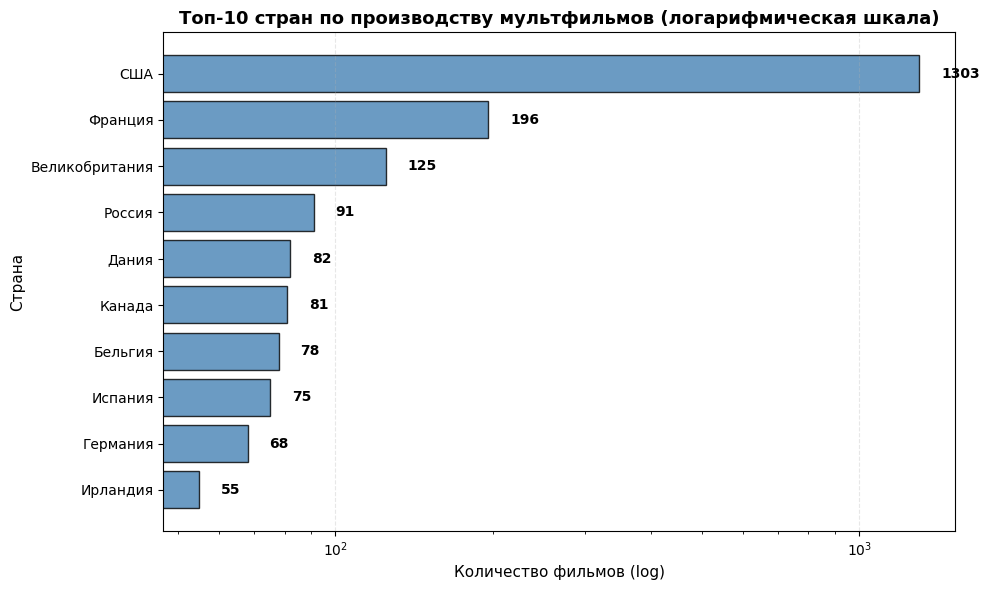


💡 Инсайт: США производят 50.2% всех мультфильмов в датасете!
   Топ-3: США, Франция, Великобритания


In [ ]:
# [1] Bar Chart: Top 10 Countries (горизонтальный, log-шкала)

# 1. Подготовка данных
top_countries = df['country'].value_counts().head(10)

# 2. Создаём график (горизонтальный)
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.barh(top_countries.index, top_countries.values, color='steelblue',
               edgecolor='black', alpha=0.8)

# 3. Логарифмическая шкала по оси X
ax.set_xscale('log')

# 4. Добавляем значения
for bar in bars:
    width = bar.get_width()
    ax.text(width * 1.1, bar.get_y() + bar.get_height()/2.,
            f'{int(width)}',
            va='center', fontsize=10, fontweight='bold')

# 5. Оформление (без эмодзи в title)
ax.set_title('Топ-10 стран по производству мультфильмов (логарифмическая шкала)',
             fontsize=13, fontweight='bold')
ax.set_xlabel('Количество фильмов (log)', fontsize=11)
ax.set_ylabel('Страна', fontsize=11)
ax.grid(axis='x', alpha=0.3, linestyle='--')
ax.invert_yaxis()  # США сверху
plt.tight_layout()
plt.show()

# 6. Инсайт
usa_share = (top_countries.iloc[0] / len(df) * 100)
print(f"\n💡 Инсайт: {top_countries.index[0]} производят {usa_share:.1f}% всех мультфильмов в датасете!")
print(f"   Топ-3: {', '.join(top_countries.head(3).index)}")

**💡 Инсайт из предыдущего графика:** В России больше мультфильмов, чем в Дании, но за какой период истории?

## 📊 [2] Horizontal Bar Chart: Top 15 Genres

**Что показывает:**  
Самые популярные жанры в мультипликации. Лидируют приключенческие, комедийные и фэнтезийные фильмы.

**Когда использовать:**  
Когда у категорий длинные названия — горизонтальный график читается лучше, чем вертикальный с повёрнутыми подписями.

**Библиотеки:** `matplotlib`

**Метод:** `plt.barh()` — horizontal bar chart (горизонтальная столбчатая диаграмма).

/tmp/ipython-input-816486237.py:20: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


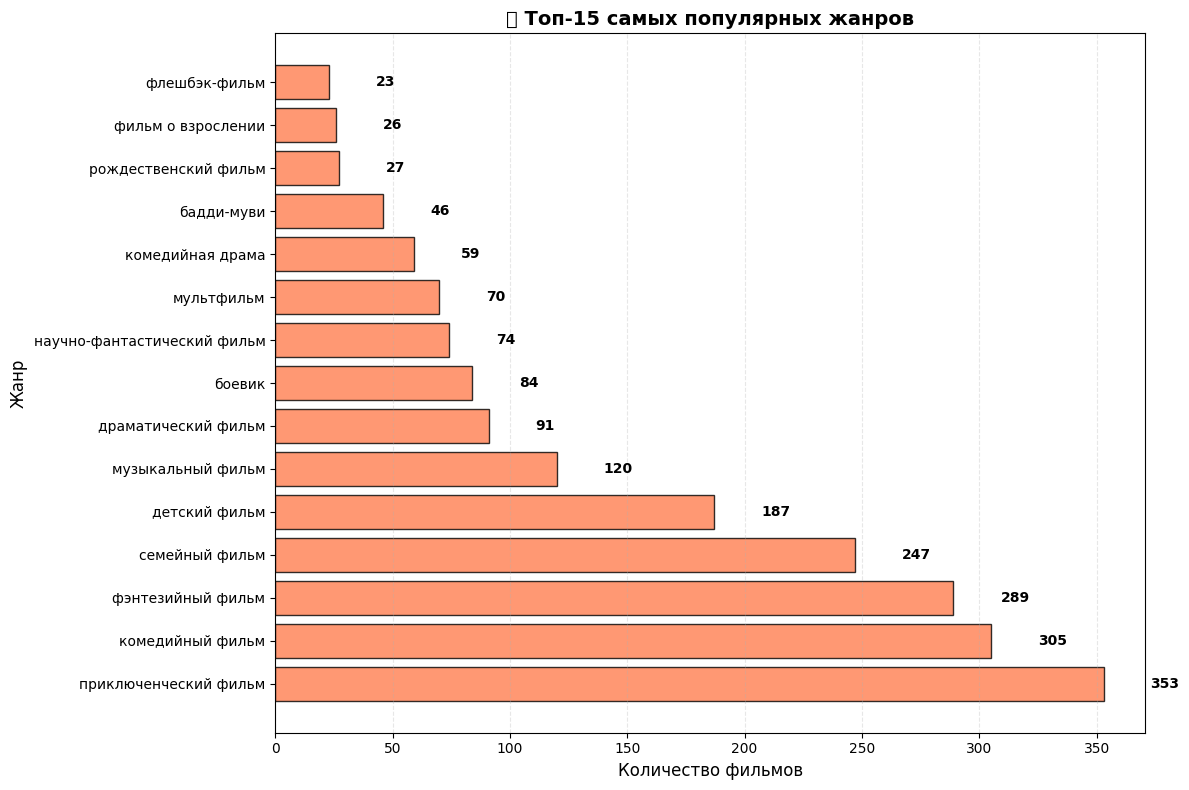

💡 Инсайт: Приключенческие фильмы (353) встречаются в 15.3 раз чаще, чем флешбэк-фильм (23)


In [ ]:
# 📊 [2] Horizontal Bar Chart: Top 15 Genres

# 1. Подготовка данных
top_genres = df['genre'].value_counts().head(15)

# 2. Создаём график
plt.figure(figsize=(12, 8))
bars = plt.barh(top_genres.index, top_genres.values, color='coral', edgecolor='black', alpha=0.8)

# 3. Добавляем значения справа от столбцов
for i, (genre, count) in enumerate(top_genres.items()):
    plt.text(count + 20, i, f'{count}',
             va='center', fontsize=10, fontweight='bold')

# 4. Оформление
plt.title('🎬 Топ-15 самых популярных жанров', fontsize=14, fontweight='bold')
plt.xlabel('Количество фильмов', fontsize=12)
plt.ylabel('Жанр', fontsize=12)
plt.grid(axis='x', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

# 5. Инсайт
print(f"💡 Инсайт: Приключенческие фильмы ({top_genres.iloc[0]}) встречаются в {top_genres.iloc[0]/top_genres.iloc[-1]:.1f} раз чаще, чем {top_genres.index[-1]} ({top_genres.iloc[-1]})")

**💡 Вопрос к предыдущему графику:** Какова совместная встречаемость жанров в мире и у конкретных стран?

## 📊 [3] Histogram: Budget Distribution

**Что показывает:** Распределение бюджетов мультфильмов. + Логарифм по Y, + увеличен шрифт легенды.

**Когда использовать:** Для анализа распределения одной числовой переменной (бюджет, возраст, зарплата).

**Библиотеки:** `matplotlib`

**Параметр bins:** Количество "корзин" для группировки значений (30 bins = 30 столбцов).

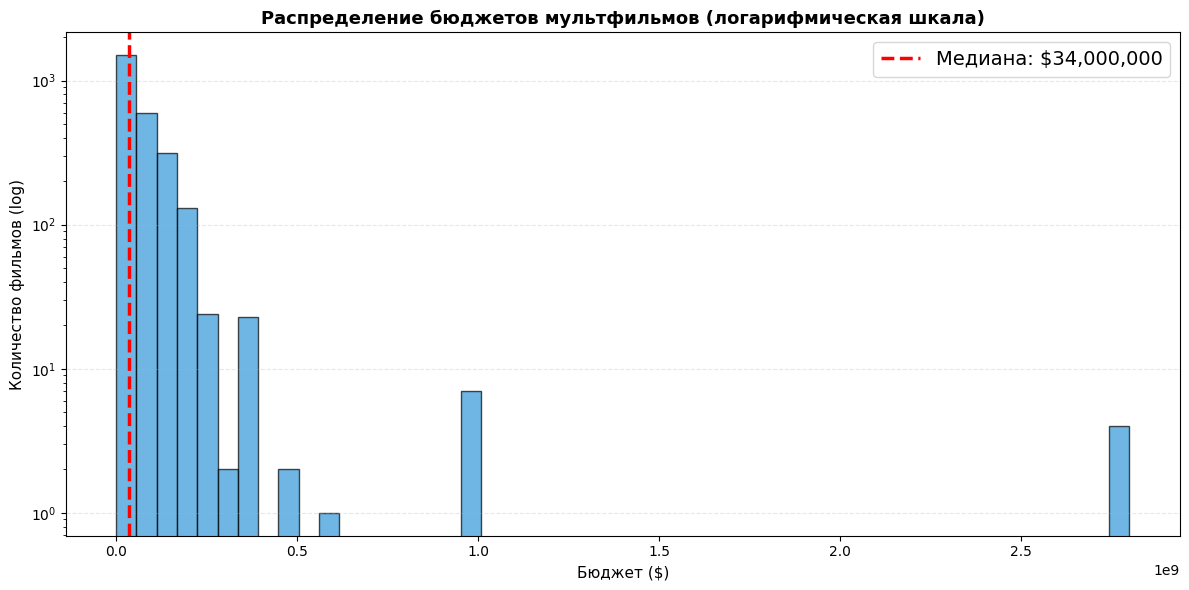


💡 Инсайт: Медианный бюджет — $34,000,000
   Блокбастеров (≥$50M): 1155 (44.5%)


In [ ]:
# [3] Histogram: Budget Distribution (логарифмическая ось Y)

# 1. Подготовка данных: фильтруем нулевые бюджеты
df_with_budget = df[df['capital_cost'] > 0].copy()

# 2. Создаём график
plt.figure(figsize=(12, 6))
n, bins, patches = plt.hist(
    df_with_budget['capital_cost'],
    bins=50,
    color='#3498db',
    edgecolor='black',
    alpha=0.7
)

# 3. Логарифмическая ось Y
plt.yscale('log')

# 4. Добавляем вертикальную линию на медиане
median_budget = df_with_budget['capital_cost'].median()
plt.axvline(median_budget, color='red', linestyle='--', linewidth=2.5,
            label=f'Медиана: ${median_budget:,.0f}')

# 5. Оформление (без эмодзи, увеличенный шрифт легенды)
plt.title('Распределение бюджетов мультфильмов (логарифмическая шкала)',
          fontsize=13, fontweight='bold')
plt.xlabel('Бюджет ($)', fontsize=11)
plt.ylabel('Количество фильмов (log)', fontsize=11)
plt.legend(fontsize=14, loc='upper right')  # 👈 Увеличен в 2-3 раза
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

# 6. Инсайт
print(f"\n💡 Инсайт: Медианный бюджет — ${median_budget:,.0f}")
high_budget = (df_with_budget['capital_cost'] >= 50_000_000).sum()
print(f"   Блокбастеров (≥$50M): {high_budget} ({high_budget/len(df_with_budget)*100:.1f}%)")

**💡 Замечания к предыдущему графику:** 1) добавить значения у столбцов. 2) Вместо 1е9 писать **млрд**

**💡Идея:** распределение бюджетов по жанрам (+ по странам). То есть какие жанры побогаче? Какие жанры чаще и реже? Как богатые жанры распределены по странам? Столбец составить из кубиков (жанры).

## 💬 Фидбек AI 1: Histogram Budget — разрыв шкалы, форматирование осей

Загрузил в чат ячейку с кодом.

Замечания к коду:

1. Вместо 1e9 лучше в названии оси X писать не просто "Бюджет ($)", а дополнительно указать млрд (миллиард американских тугриков).

2. Много пустого места по оси X примерно от 1.1 (назовём X1) до 2.6-2.7 (назовём X2). Предлагаю сделать на оси X неравномерную шкалу: видим шкалу от 0 до X1, затем что-то вроде многоточия или разрыв, затем видим шкалу от X2 до X3 (где X3 ≈ 2.8). Пусть X1, X2, X3 являются входными параметрами в начале ячейки с кодом, чтобы мне было удобно их менять вручную.

3. Плохо выглядят на оси Y подписи у шкалы 10^1, 10^2... Давай без степеней, не мудри, просто: 10, 100, 1000...

4. Сейчас на графике есть подпись: "Медиана $34,000,000" — плохо, ибо в глазах рябит от нолей. Лучше писать миллиарды (млрд).

5. Добавь над столбцами, которые сейчас по оси X там, где X > 0.5 (на текущей шкале), чтобы сверху была подпись значения над bar.


## 💬 Фидбек AI 1: Разрыв оси X + форматирование (Budget Histogram)

Загрузил в чат ячейку с кодом. Замечания:

1. **Ось X:** Добавить "млрд" в подпись оси (вместо просто "$").

2. **Разрыв шкалы:** Много пустого места от 1.1 до 2.6 млрд → сделать неравномерную шкалу с разрывом. Параметры `X1`, `X2`, `X3` — входные (для ручной настройки).

3. **Ось Y:** Убрать степени (`10^1`, `10^2`) → писать нормально: `10`, `100`, `1000`.

4. **Медиана:** Вместо "$34,000,000" писать "млрд" (меньше нулей).

5. **Подписи над bars:** Добавить значения над столбцами, где `X > 0.5` млрд.

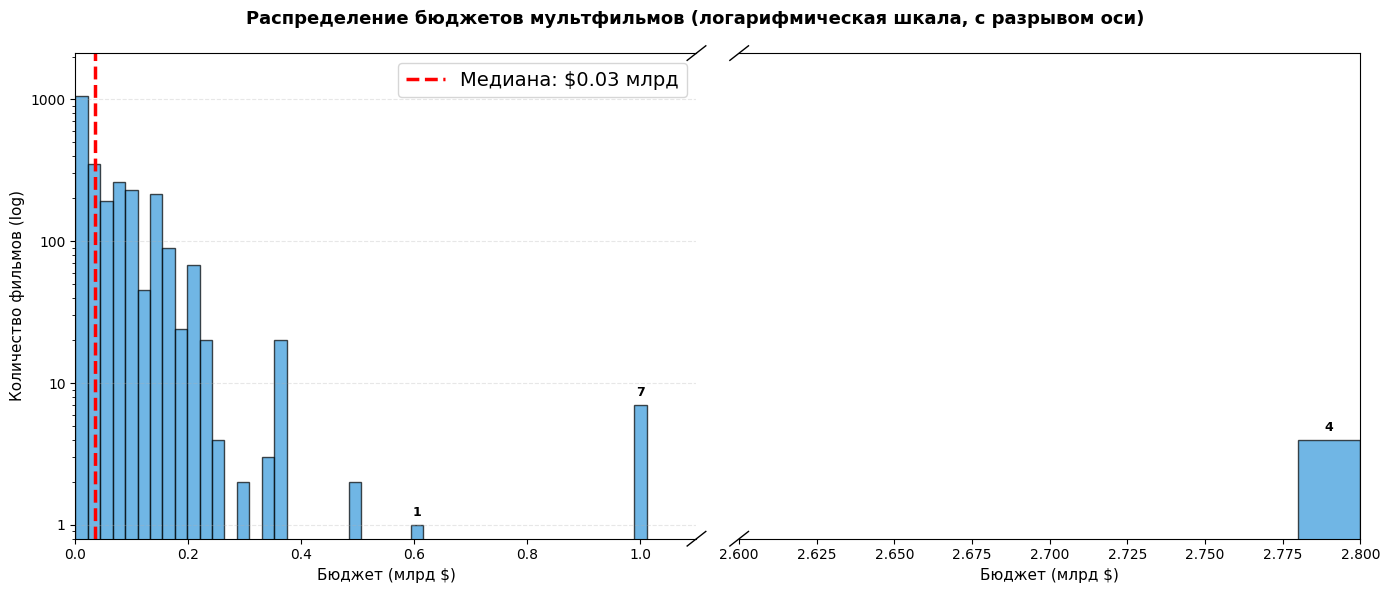


💡 Инсайт: Медианный бюджет — $0.03 млрд ($34 млн)
   Блокбастеров (≥$50M): 1155 (44.5%)
   Бюджетов > $1.1 млрд: 4 фильмов
   Самый дорогой фильм: $2.80 млрд


In [25]:
# [3] Histogram: Budget Distribution (логарифмическая ось Y, с разрывом шкалы)

# ⚙️ НАСТРОЙКИ (входные параметры для удобной настройки)
X1 = 1.1  # Конец первой части шкалы (млрд $)
X2 = 2.6  # Начало второй части шкалы (млрд $)
X3 = 2.8  # Конец второй части шкалы (млрд $)

# 1. Подготовка данных: фильтруем нулевые бюджеты
df_with_budget = df[df['capital_cost'] > 0].copy()
df_with_budget['budget_billions'] = df_with_budget['capital_cost'] / 1e9  # Переводим в млрд

# 2. Создаём subplot с двумя частями (для разрыва шкалы)
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
import matplotlib.patches as mpatches

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
fig.subplots_adjust(wspace=0.05)  # Минимальный отступ между графиками

# 3. Первая часть (0 до X1)
n1, bins1, patches1 = ax1.hist(
    df_with_budget['budget_billions'],
    bins=50,
    range=(0, X1),
    color='#3498db',
    edgecolor='black',
    alpha=0.7
)

# 4. Вторая часть (X2 до X3)
n2, bins2, patches2 = ax2.hist(
    df_with_budget['budget_billions'],
    bins=10,
    range=(X2, X3),
    color='#3498db',
    edgecolor='black',
    alpha=0.7
)

# 5. Логарифмическая ось Y
ax1.set_yscale('log')
ax2.set_yscale('log')

# 6. Добавляем медиану на первой части
median_budget_billions = df_with_budget['budget_billions'].median()
ax1.axvline(median_budget_billions, color='red', linestyle='--', linewidth=2.5,
            label=f'Медиана: ${median_budget_billions:.2f} млрд')

# 7. Подписи НАД столбцами (только где X > 0.5 млрд на первой части)
for i, (count, bin_edge) in enumerate(zip(n1, bins1[:-1])):
    if bin_edge > 0.5 and count > 0:
        ax1.text(bin_edge + (bins1[1]-bins1[0])/2, count * 1.15,
                 f'{int(count)}', ha='center', fontsize=9, fontweight='bold')

# Подписи НАД столбцами на второй части (все)
for i, (count, bin_edge) in enumerate(zip(n2, bins2[:-1])):
    if count > 0:
        ax2.text(bin_edge + (bins2[1]-bins2[0])/2, count * 1.15,
                 f'{int(count)}', ha='center', fontsize=9, fontweight='bold')

# 8. Оформление оси Y (убираем степени, пишем нормальные числа)
from matplotlib.ticker import FuncFormatter
def y_fmt(y, pos):
    return f'{int(y)}'

ax1.yaxis.set_major_formatter(FuncFormatter(y_fmt))
ax1.set_ylim(bottom=0.8, top=max(n1.max(), n2.max()) * 2)  # Место для подписей

# 9. Оформление осей X
ax1.set_xlabel('Бюджет (млрд $)', fontsize=11)
ax2.set_xlabel('Бюджет (млрд $)', fontsize=11)
ax1.set_ylabel('Количество фильмов (log)', fontsize=11)
ax1.set_xlim(0, X1)
ax2.set_xlim(X2, X3)

# 10. Убираем правый spine у ax1 и левый у ax2 (эффект разрыва)
ax1.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax1.yaxis.tick_left()
ax2.yaxis.set_visible(False)

# 11. Добавляем диагональные линии разрыва
d = 0.015  # Размер диагональных линий
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False, linewidth=1)
ax1.plot((1-d, 1+d), (-d, +d), **kwargs)
ax1.plot((1-d, 1+d), (1-d, 1+d), **kwargs)

kwargs.update(transform=ax2.transAxes)
ax2.plot((-d, +d), (-d, +d), **kwargs)
ax2.plot((-d, +d), (1-d, 1+d), **kwargs)

# 12. Общий заголовок и легенда
fig.suptitle('Распределение бюджетов мультфильмов (логарифмическая шкала, с разрывом оси)',
             fontsize=13, fontweight='bold', y=0.98)
ax1.legend(fontsize=14, loc='upper right')
ax1.grid(axis='y', alpha=0.3, linestyle='--')
ax2.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

# 13. Инсайт
median_millions = median_budget_billions * 1000
print(f"\n💡 Инсайт: Медианный бюджет — ${median_budget_billions:.2f} млрд (${median_millions:.0f} млн)")
high_budget = (df_with_budget['capital_cost'] >= 50_000_000).sum()
print(f"   Блокбастеров (≥$50M): {high_budget} ({high_budget/len(df_with_budget)*100:.1f}%)")
print(f"   Бюджетов > ${X1} млрд: {(df_with_budget['budget_billions'] > X1).sum()} фильмов")
print(f"   Самый дорогой фильм: ${df_with_budget['budget_billions'].max():.2f} млрд")

## 💬 Фидбек AI 2: Тройной разрыв оси X + подписи над всеми столбцами (Budget Histogram)

Замечания:

1. **Неравномерная шкала:** Интервал от 0 (параметр `Z1`) до 0.4 (параметр `Z2`) слишком сгущён → сделать его в ~3 раза шире остальных частей. Добавить второй разрыв шкалы. Параметры `Scale2`, `Scale3` (в %) — доля ширины для второй и третьей частей шкалы. Если `Scale2=30`, `Scale3=10`, то первая часть займёт 60%.

2. **Параметры шкалы:** 3 части шкалы → 6 переменных для границ (начало/конец каждой части). Все параметры — в начале кода для ручной настройки.

3. **Подписи над всеми столбцами:** Числа фильмов должны быть над **всеми** bars (не только где `X > 0.5`).

/tmp/ipython-input-3203004009.py:143: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



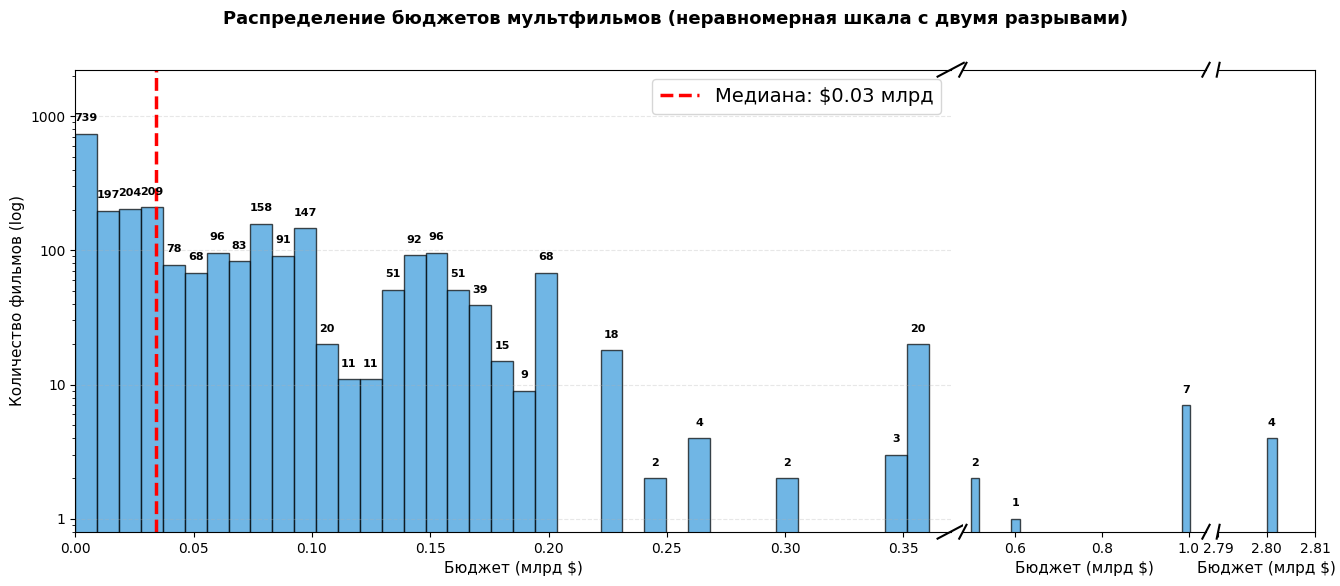


💡 Инсайт: Медианный бюджет — $0.03 млрд ($34 млн)
   Блокбастеров (≥$50M): 1155 (44.5%)

   Распределение по частям шкалы:
   Часть 1 (0.0-0.37 млрд): 2582 фильмов (99.5%)
   Часть 2 (0.48-1.04 млрд): 10 фильмов (0.4%)
   Часть 3 (2.79-2.81 млрд): 4 фильмов (0.2%)

   Самый дорогой фильм: $2.80 млрд


In [35]:
# [3] Histogram: Budget Distribution (3 части шкалы с неравномерной шириной)

# ⚙️ НАСТРОЙКИ (входные параметры для ручной настройки)
# Границы трёх частей шкалы (в млрд $)
SCALE1_START = 0.0    # Начало первой части
SCALE1_END = 0.37      # Конец первой части
SCALE2_START = 0.48    # Начало второй части
SCALE2_END = 1.04      # Конец второй части
SCALE3_START = 2.79    # Начало третьей части
SCALE3_END = 2.81      # Конец третьей части

# Доли ширины графика для каждой части (в %)
SCALE1_WIDTH = 72     # Первая часть (самая широкая)
SCALE2_WIDTH = 20     # Вторая часть
SCALE3_WIDTH = 8     # Третья часть

# 1. Подготовка данных: фильтруем нулевые бюджеты
df_with_budget = df[df['capital_cost'] > 0].copy()
df_with_budget['budget_billions'] = df_with_budget['capital_cost'] / 1e9

# 2. Создаём 3 subplot'а с настраиваемой шириной
from matplotlib import pyplot as plt
from matplotlib.ticker import FuncFormatter

fig = plt.figure(figsize=(16, 6))
gs = fig.add_gridspec(1, 3, width_ratios=[SCALE1_WIDTH, SCALE2_WIDTH, SCALE3_WIDTH],
                      wspace=0.03)
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1], sharey=ax1)
ax3 = fig.add_subplot(gs[2], sharey=ax1)

# 3. Гистограммы для каждой части
# Часть 1: SCALE1_START → SCALE1_END
n1, bins1, patches1 = ax1.hist(
    df_with_budget['budget_billions'],
    bins=40,
    range=(SCALE1_START, SCALE1_END),
    color='#3498db',
    edgecolor='black',
    alpha=0.7
)

# Часть 2: SCALE2_START → SCALE2_END
n2, bins2, patches2 = ax2.hist(
    df_with_budget['budget_billions'],
    bins=30,
    range=(SCALE2_START, SCALE2_END),
    color='#3498db',
    edgecolor='black',
    alpha=0.7
)

# Часть 3: SCALE3_START → SCALE3_END
n3, bins3, patches3 = ax3.hist(
    df_with_budget['budget_billions'],
    bins=10,
    range=(SCALE3_START, SCALE3_END),
    color='#3498db',
    edgecolor='black',
    alpha=0.7
)

# 4. Логарифмическая ось Y для всех
ax1.set_yscale('log')
ax2.set_yscale('log')
ax3.set_yscale('log')

# 5. Добавляем медиану на первой части
median_budget_billions = df_with_budget['budget_billions'].median()
ax1.axvline(median_budget_billions, color='red', linestyle='--', linewidth=2.5,
            label=f'Медиана: ${median_budget_billions:.2f} млрд')

# 6. Подписи НАД ВСЕМИ столбцами
def add_labels(ax, n, bins):
    for i, (count, bin_edge) in enumerate(zip(n, bins[:-1])):
        if count > 0:
            bin_center = bin_edge + (bins[i+1] - bins[i]) / 2
            ax.text(bin_center, count * 1.2,
                    f'{int(count)}', ha='center', va='bottom',
                    fontsize=8, fontweight='bold')

add_labels(ax1, n1, bins1)
add_labels(ax2, n2, bins2)
add_labels(ax3, n3, bins3)

# 7. Оформление оси Y (убираем степени)
def y_fmt(y, pos):
    if y >= 1:
        return f'{int(y)}'
    return ''

ax1.yaxis.set_major_formatter(FuncFormatter(y_fmt))
y_max = max(n1.max(), n2.max(), n3.max()) * 3  # Место для подписей
ax1.set_ylim(bottom=0.8, top=y_max)

# 8. Оформление осей X
ax1.set_xlabel('Бюджет (млрд $)', fontsize=11)
ax2.set_xlabel('Бюджет (млрд $)', fontsize=11)
ax3.set_xlabel('Бюджет (млрд $)', fontsize=11)
ax1.set_ylabel('Количество фильмов (log)', fontsize=11)

ax1.set_xlim(SCALE1_START, SCALE1_END)
ax2.set_xlim(SCALE2_START, SCALE2_END)
ax3.set_xlim(SCALE3_START, SCALE3_END)

# 9. Убираем лишние spines (эффект разрыва)
ax1.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax3.spines['left'].set_visible(False)

ax1.yaxis.tick_left()
ax2.yaxis.set_visible(False)
ax3.yaxis.set_visible(False)

# 10. Диагональные линии разрыва (между ax1-ax2)
d = 0.015
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False, linewidth=1.5)
ax1.plot((1-d, 1+d), (-d, +d), **kwargs)
ax1.plot((1-d, 1+d), (1-d, 1+d), **kwargs)

kwargs.update(transform=ax2.transAxes)
ax2.plot((-d, +d), (-d, +d), **kwargs)
ax2.plot((-d, +d), (1-d, 1+d), **kwargs)

# Диагональные линии разрыва (между ax2-ax3)
kwargs.update(transform=ax2.transAxes)
ax2.plot((1-d, 1+d), (-d, +d), **kwargs)
ax2.plot((1-d, 1+d), (1-d, 1+d), **kwargs)

kwargs.update(transform=ax3.transAxes)
ax3.plot((-d, +d), (-d, +d), **kwargs)
ax3.plot((-d, +d), (1-d, 1+d), **kwargs)

# 11. Общий заголовок и легенда
fig.suptitle('Распределение бюджетов мультфильмов (неравномерная шкала с двумя разрывами)',
             fontsize=13, fontweight='bold', y=0.98)
ax1.legend(fontsize=14, loc='upper right')
ax1.grid(axis='y', alpha=0.3, linestyle='--')
ax2.grid(axis='y', alpha=0.3, linestyle='--')
ax3.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

# 12. Инсайт
median_millions = median_budget_billions * 1000
print(f"\n💡 Инсайт: Медианный бюджет — ${median_budget_billions:.2f} млрд (${median_millions:.0f} млн)")
high_budget = (df_with_budget['capital_cost'] >= 50_000_000).sum()
print(f"   Блокбастеров (≥$50M): {high_budget} ({high_budget/len(df_with_budget)*100:.1f}%)")

# Статистика по частям шкалы
part1_count = ((df_with_budget['budget_billions'] >= SCALE1_START) &
               (df_with_budget['budget_billions'] < SCALE1_END)).sum()
part2_count = ((df_with_budget['budget_billions'] >= SCALE2_START) &
               (df_with_budget['budget_billions'] < SCALE2_END)).sum()
part3_count = ((df_with_budget['budget_billions'] >= SCALE3_START) &
               (df_with_budget['budget_billions'] <= SCALE3_END)).sum()

print(f"\n   Распределение по частям шкалы:")
print(f"   Часть 1 ({SCALE1_START}-{SCALE1_END} млрд): {part1_count} фильмов ({part1_count/len(df_with_budget)*100:.1f}%)")
print(f"   Часть 2 ({SCALE2_START}-{SCALE2_END} млрд): {part2_count} фильмов ({part2_count/len(df_with_budget)*100:.1f}%)")
print(f"   Часть 3 ({SCALE3_START}-{SCALE3_END} млрд): {part3_count} фильмов ({part3_count/len(df_with_budget)*100:.1f}%)")
print(f"\n   Самый дорогой фильм: ${df_with_budget['budget_billions'].max():.2f} млрд")

## 💬 Фидбек AI 3: Улучшение масштабирования + цветовая кодировка жанров (Budget Histogram)

Замечания:

1. **Подпись оси X:** Три одинаковых подписи "Бюджет (млрд $)" → оставить только одну (центральную).

2. **Размер шрифта подписей над столбцами:** Текущий размер мелковат → увеличить в ~2 раза (добавить параметр `LABEL_FONTSIZE`).

3. **Масштабирование столбцов:** При уменьшении ширины второй и третьей шкал столбцы сжимаются → нужно сохранить ширину/высоту столбцов такой же, как в первой части (компенсировать изменением `bins`).

4. **Формат медианы:** "Медиана 0.03 млрд" выглядит странно → переписать в миллионах (млн).

5. **Цветовая кодировка жанров:** Столбцы сплошного цвета → разбить на цветные сегменты по жанрам. Добавить:
   - Карту цветов для жанров
   - Упорядочить жанры одинаково во всех столбцах (для сравнения)
   - Подписи с количеством фильмов внутри цветных сегментов

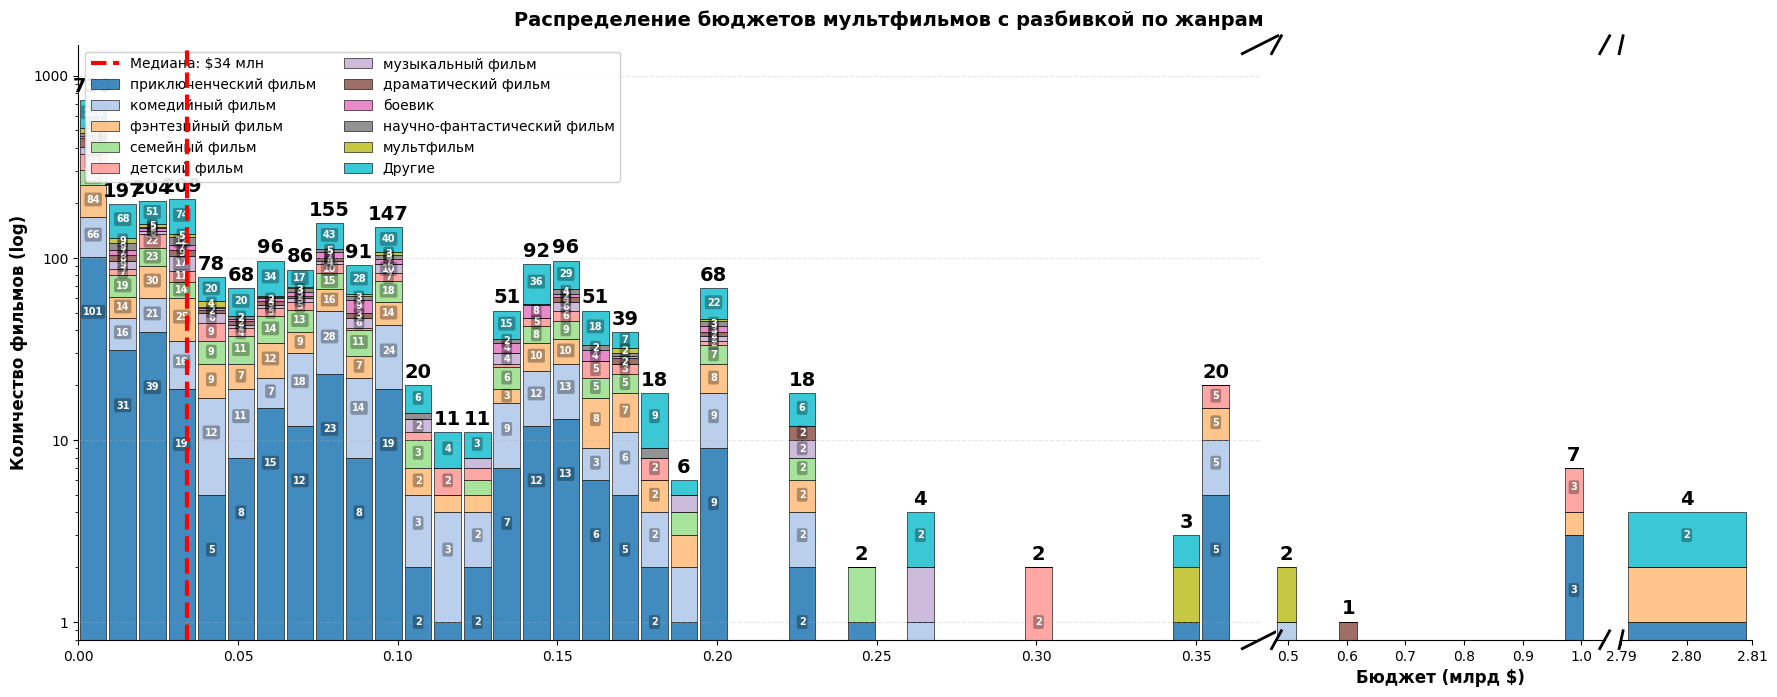


💡 Инсайт: Медианный бюджет — $34 млн ($0.034 млрд)
   Блокбастеров (≥$50M): 1155 (44.5%)

   Распределение по частям шкалы:
   Часть 1 (0.0-0.37 млрд): 2582 фильмов (99.5%)
   Часть 2 (0.48-1.04 млрд): 10 фильмов (0.4%)
   Часть 3 (2.79-2.81 млрд): 4 фильмов (0.2%)

   Топ-3 жанра по количеству фильмов:
   1. Другие: 776 фильмов (средний бюджет: $66 млн)
   2. приключенческий фильм: 353 фильмов (средний бюджет: $77 млн)
   3. комедийный фильм: 305 фильмов (средний бюджет: $74 млн)

   Самый дорогой фильм: $2.80 млрд
   (Порко Россо, жанр: фэнтезийная манга или аниме)


In [38]:
# [3] Histogram: Budget Distribution (3 части, цветовая кодировка по жанрам)

# ⚙️ НАСТРОЙКИ (входные параметры для ручной настройки)
# Границы трёх частей шкалы (в млрд $)
SCALE1_START = 0.0    # Начало первой части
SCALE1_END = 0.37     # Конец первой части
SCALE2_START = 0.48   # Начало второй части
SCALE2_END = 1.04     # Конец второй части
SCALE3_START = 2.79   # Начало третьей части
SCALE3_END = 2.81     # Конец третьей части

# Доли ширины графика для каждой части (в %)
SCALE1_WIDTH = 72     # Первая часть (самая широкая)
SCALE2_WIDTH = 20     # Вторая часть
SCALE3_WIDTH = 8      # Третья часть

# Размер шрифта подписей над столбцами
LABEL_FONTSIZE = 14

# 1. Подготовка данных: фильтруем нулевые бюджеты
df_with_budget = df[df['capital_cost'] > 0].copy()
df_with_budget.loc[:, 'budget_billions'] = df_with_budget['capital_cost'] / 1e9

# 2. Топ-10 жанров для цветовой кодировки (остальные → "Другие")
top_genres = df['genre'].value_counts().head(10).index.tolist()
df_with_budget.loc[:, 'genre_grouped'] = df_with_budget['genre'].apply(
    lambda x: x if x in top_genres else 'Другие'
)

# 3. Карта цветов для жанров (фиксированный порядок)
genre_order = top_genres + ['Другие']
genre_colors = {
    genre: plt.cm.tab20(i / len(genre_order))
    for i, genre in enumerate(genre_order)
}

# 4. Вычисляем количество bins для сохранения ширины столбцов
bins1 = 40
bin_width1 = (SCALE1_END - SCALE1_START) / bins1

bins2 = int((SCALE2_END - SCALE2_START) / bin_width1)
bins3 = int((SCALE3_END - SCALE3_START) / bin_width1)

visual_scale2 = SCALE1_WIDTH / SCALE2_WIDTH
visual_scale3 = SCALE1_WIDTH / SCALE3_WIDTH
bins2 = max(1, int(bins2 / visual_scale2))
bins3 = max(1, int(bins3 / visual_scale3))

# 5. Создаём функцию для построения stacked histogram с жанрами
def create_genre_histogram(ax, df_data, start, end, n_bins, show_legend=False):
    """Создаёт stacked histogram с разбивкой по жанрам"""

    # Фильтруем данные для текущего диапазона
    mask = (df_data['budget_billions'] >= start) & (df_data['budget_billions'] <= end)
    df_filtered = df_data[mask].copy()

    if len(df_filtered) == 0:
        return [], []

    # Создаём bins
    bins = np.linspace(start, end, n_bins + 1)
    bin_centers = (bins[:-1] + bins[1:]) / 2

    # Группируем данные по bins и жанрам
    df_filtered.loc[:, 'bin'] = pd.cut(df_filtered['budget_billions'], bins,
                                        labels=range(len(bins)-1), include_lowest=True)

    # Создаём stacked histogram
    bottom = np.zeros(n_bins)
    bar_width = (bins[1] - bins[0]) * 0.9

    for genre in genre_order:
        genre_counts = df_filtered[df_filtered['genre_grouped'] == genre].groupby(
            'bin', observed=True  # 👈 Исправление FutureWarning
        ).size()
        heights = [genre_counts.get(i, 0) for i in range(n_bins)]

        # Рисуем столбцы (label только для первой части - show_legend=True)
        bars = ax.bar(bin_centers, heights, width=bar_width, bottom=bottom,
                      color=genre_colors[genre], edgecolor='black',
                      linewidth=0.5, alpha=0.85,
                      label=genre if show_legend else "")  # 👈 Легенда только для ax1

        # Добавляем подписи внутри сегментов (если высота > 0)
        for i, (height, bin_center) in enumerate(zip(heights, bin_centers)):
            if height > 0:
                y_pos = bottom[i] + height / 2
                if height > 1:
                    ax.text(bin_center, y_pos, f'{int(height)}',
                           ha='center', va='center', fontsize=7,
                           fontweight='bold', color='white',
                           bbox=dict(boxstyle='round,pad=0.2',
                                   facecolor='black', alpha=0.3, edgecolor='none'))

        bottom += heights

    # Общие подписи над столбцами
    for i, (total, bin_center) in enumerate(zip(bottom, bin_centers)):
        if total > 0:
            ax.text(bin_center, total * 1.05, f'{int(total)}',
                   ha='center', va='bottom', fontsize=LABEL_FONTSIZE,
                   fontweight='bold', color='black')

    return bins, bottom

# 6. Создаём 3 subplot'а с настраиваемой шириной
from matplotlib import pyplot as plt
from matplotlib.ticker import FuncFormatter
import numpy as np
import pandas as pd

fig = plt.figure(figsize=(18, 7))
gs = fig.add_gridspec(1, 3, width_ratios=[SCALE1_WIDTH, SCALE2_WIDTH, SCALE3_WIDTH],
                      wspace=0.03)
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1], sharey=ax1)
ax3 = fig.add_subplot(gs[2], sharey=ax1)

# 7. Строим histograms для каждой части (легенда ТОЛЬКО у ax1)
bins1_arr, heights1 = create_genre_histogram(ax1, df_with_budget,
                                              SCALE1_START, SCALE1_END, bins1,
                                              show_legend=True)  # 👈 Легенда только здесь
bins2_arr, heights2 = create_genre_histogram(ax2, df_with_budget,
                                              SCALE2_START, SCALE2_END, bins2,
                                              show_legend=False)
bins3_arr, heights3 = create_genre_histogram(ax3, df_with_budget,
                                              SCALE3_START, SCALE3_END, bins3,
                                              show_legend=False)

# 8. Логарифмическая ось Y
ax1.set_yscale('log')
ax2.set_yscale('log')
ax3.set_yscale('log')

# 9. Добавляем медиану на первой части
median_budget_billions = df_with_budget['budget_billions'].median()
median_budget_millions = median_budget_billions * 1000
ax1.axvline(median_budget_billions, color='red', linestyle='--', linewidth=3,
            label=f'Медиана: ${median_budget_millions:.0f} млн', zorder=100)

# 10. Оформление оси Y (убираем степени)
def y_fmt(y, pos):
    if y >= 1:
        return f'{int(y)}'
    return ''

ax1.yaxis.set_major_formatter(FuncFormatter(y_fmt))
y_max = max(heights1.max() if len(heights1) > 0 else 1,
            heights2.max() if len(heights2) > 0 else 1,
            heights3.max() if len(heights3) > 0 else 1) * 2
ax1.set_ylim(bottom=0.8, top=y_max)

# 11. Оформление осей X (ОДНА общая подпись внизу посередине)
ax1.set_ylabel('Количество фильмов (log)', fontsize=12, fontweight='bold')
ax1.set_xlim(SCALE1_START, SCALE1_END)
ax2.set_xlim(SCALE2_START, SCALE2_END)
ax3.set_xlim(SCALE3_START, SCALE3_END)

ax2.set_xlabel('Бюджет (млрд $)', fontsize=12, fontweight='bold')
ax1.set_xlabel('')
ax3.set_xlabel('')

# 12. Убираем верхние и правые spines (контуры графика)
for ax in [ax1, ax2, ax3]:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# Убираем лишние spines для эффекта разрыва
ax1.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax3.spines['left'].set_visible(False)

ax1.yaxis.tick_left()
ax2.yaxis.set_visible(False)
ax3.yaxis.set_visible(False)

# 13. Диагональные линии разрыва
d = 0.015
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False, linewidth=2)
ax1.plot((1-d, 1+d), (-d, +d), **kwargs)
ax1.plot((1-d, 1+d), (1-d, 1+d), **kwargs)

kwargs.update(transform=ax2.transAxes)
ax2.plot((-d, +d), (-d, +d), **kwargs)
ax2.plot((-d, +d), (1-d, 1+d), **kwargs)
ax2.plot((1-d, 1+d), (-d, +d), **kwargs)
ax2.plot((1-d, 1+d), (1-d, 1+d), **kwargs)

kwargs.update(transform=ax3.transAxes)
ax3.plot((-d, +d), (-d, +d), **kwargs)
ax3.plot((-d, +d), (1-d, 1+d), **kwargs)

# 14. Общий заголовок и легенда (ОДНА легенда - только от ax1)
fig.suptitle('Распределение бюджетов мультфильмов с разбивкой по жанрам',
             fontsize=14, fontweight='bold', y=0.98)

# Легенда медианы + жанры (только для ax1)
ax1.legend(loc='upper left', fontsize=10, framealpha=0.9, ncol=2)

ax1.grid(axis='y', alpha=0.3, linestyle='--')
ax2.grid(axis='y', alpha=0.3, linestyle='--')
ax3.grid(axis='y', alpha=0.3, linestyle='--')

# 👈 Исправление UserWarning: используем plt.subplots_adjust вместо tight_layout
plt.subplots_adjust(left=0.05, right=0.98, top=0.93, bottom=0.08)
plt.show()

# 15. Инсайт
print(f"\n💡 Инсайт: Медианный бюджет — ${median_budget_millions:.0f} млн (${median_budget_billions:.3f} млрд)")
high_budget = (df_with_budget['capital_cost'] >= 50_000_000).sum()
print(f"   Блокбастеров (≥$50M): {high_budget} ({high_budget/len(df_with_budget)*100:.1f}%)")

# Статистика по частям шкалы
part1_count = ((df_with_budget['budget_billions'] >= SCALE1_START) &
               (df_with_budget['budget_billions'] < SCALE1_END)).sum()
part2_count = ((df_with_budget['budget_billions'] >= SCALE2_START) &
               (df_with_budget['budget_billions'] < SCALE2_END)).sum()
part3_count = ((df_with_budget['budget_billions'] >= SCALE3_START) &
               (df_with_budget['budget_billions'] <= SCALE3_END)).sum()

print(f"\n   Распределение по частям шкалы:")
print(f"   Часть 1 ({SCALE1_START}-{SCALE1_END} млрд): {part1_count} фильмов ({part1_count/len(df_with_budget)*100:.1f}%)")
print(f"   Часть 2 ({SCALE2_START}-{SCALE2_END} млрд): {part2_count} фильмов ({part2_count/len(df_with_budget)*100:.1f}%)")
print(f"   Часть 3 ({SCALE3_START}-{SCALE3_END} млрд): {part3_count} фильмов ({part3_count/len(df_with_budget)*100:.1f}%)")

# Топ-3 жанра по бюджету
print(f"\n   Топ-3 жанра по количеству фильмов:")
for i, (genre, count) in enumerate(df_with_budget['genre_grouped'].value_counts().head(3).items(), 1):
    avg_budget = df_with_budget[df_with_budget['genre_grouped']==genre]['budget_billions'].mean()
    print(f"   {i}. {genre}: {count} фильмов (средний бюджет: ${avg_budget*1000:.0f} млн)")

print(f"\n   Самый дорогой фильм: ${df_with_budget['budget_billions'].max():.2f} млрд")
most_expensive = df_with_budget.loc[df_with_budget['budget_billions'].idxmax()]
print(f"   ({most_expensive['film']}, жанр: {most_expensive['genre']})")

## 📊 [5] Histogram: Duration Distribution

**Что показывает:**  
Распределение продолжительности мультфильмов. Пик приходится на 80-90 минут — стандарт полнометражного фильма.

**Когда использовать:**  
Для визуализации распределения времени, возраста, расстояний и других непрерывных величин.

**Библиотеки:** `matplotlib`

**Совет:** Используйте вертикальную линию (`axvline`) для обозначения важных значений (например, 90 минут = стандарт).

---

## [4]

Вариант B: Line Chart — Динамика публикаций по годам (с df_reviews)

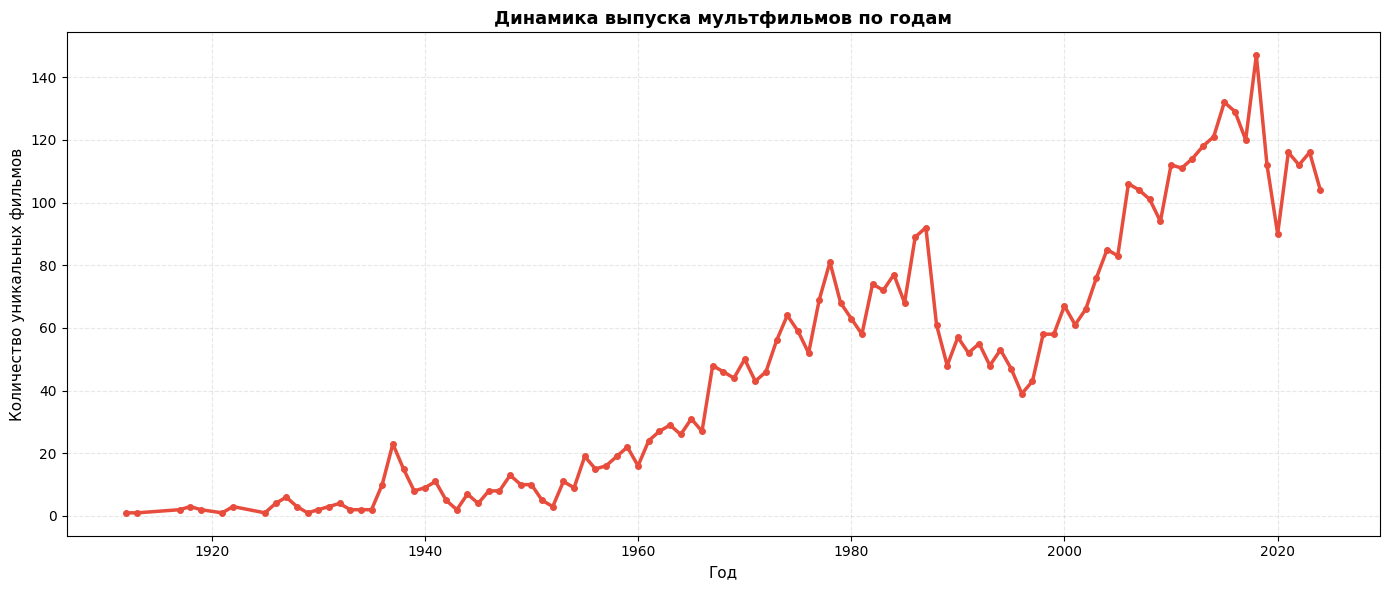


💡 Инсайт: Пик производства — 2018 год (147 фильмов)


In [ ]:
# [4] Line Chart: Publication Trends Over Time

# 1. Фильтруем корректные годы (убираем 0 и будущее)
df_years = df_reviews[(df_reviews['publicationYear'] > 1900) &
                      (df_reviews['publicationYear'] <= 2024)].copy()

# 2. Группируем по годам
yearly_counts = df_years.groupby('publicationYear')['film'].nunique().reset_index()
yearly_counts.columns = ['year', 'film_count']

# 3. Создаём график
plt.figure(figsize=(14, 6))
plt.plot(yearly_counts['year'], yearly_counts['film_count'],
         color='#e74c3c', linewidth=2.5, marker='o', markersize=4)

# 4. Оформление
plt.title('Динамика выпуска мультфильмов по годам', fontsize=13, fontweight='bold')
plt.xlabel('Год', fontsize=11)
plt.ylabel('Количество уникальных фильмов', fontsize=11)
plt.grid(alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

# 5. Инсайт
peak_year = yearly_counts.loc[yearly_counts['film_count'].idxmax()]
print(f"\n💡 Инсайт: Пик производства — {int(peak_year['year'])} год ({int(peak_year['film_count'])} фильмов)")

Новый график [X]: Stacked Bar Chart — Топ-5 оценок (assessment) и их результаты (outcome)

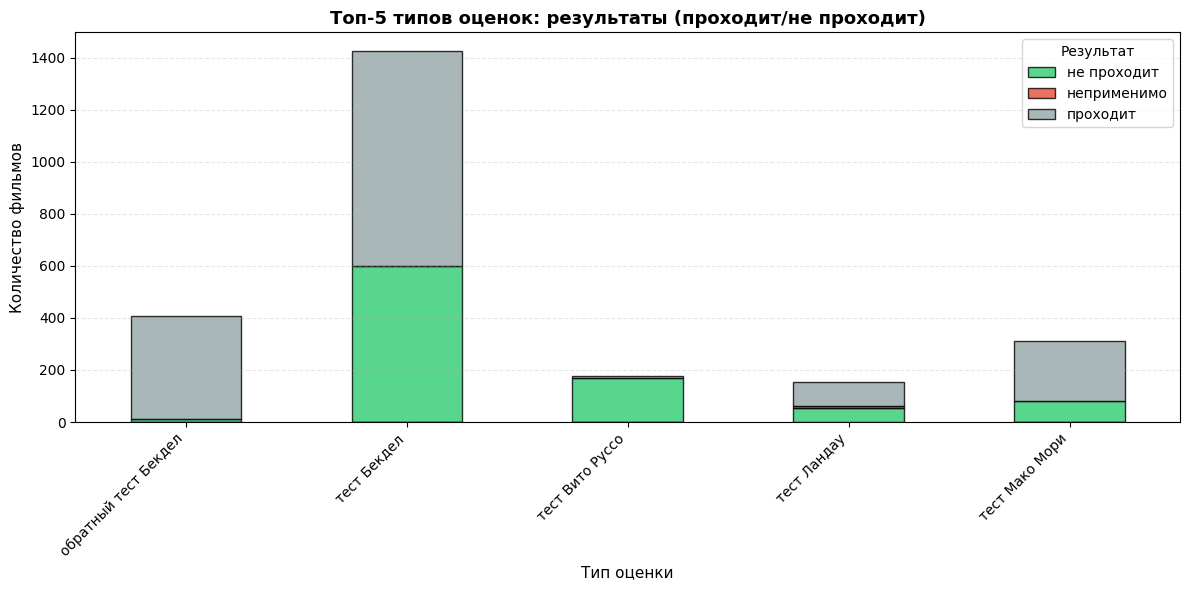

In [ ]:
# [X] Stacked Bar Chart: Top 5 Assessments and Outcomes

# 1. Топ-5 типов оценок
top5_assessments = df_reviews['assessment'].value_counts().head(5).index
df_plot = df_reviews[df_reviews['assessment'].isin(top5_assessments)]

# 2. Pivot table для stacked bar
pivot = df_plot.groupby(['assessment', 'outcome']).size().unstack(fill_value=0)

# 3. Создаём график
pivot.plot(kind='bar', stacked=True, figsize=(12, 6),
           color=['#2ecc71', '#e74c3c', '#95a5a6'],
           edgecolor='black', alpha=0.8)

# 4. Оформление
plt.title('Топ-5 типов оценок: результаты (проходит/не проходит)', fontsize=13, fontweight='bold')
plt.xlabel('Тип оценки', fontsize=11)
plt.ylabel('Количество фильмов', fontsize=11)
plt.legend(title='Результат', fontsize=10)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

🗺️ Промпт 2: Географические карты (если есть страны или координаты)

🗺️ Визуализация 1: Интерактивная Choropleth Map (Plotly) — Карта мира по количеству мультфильмов

In [ ]:
# 🗺️ Географическая визуализация 1: Choropleth Map
# Интерактивная карта мира с цветовой кодировкой по количеству мультфильмов

import plotly.express as px
import pandas as pd

# 1. Подготовка данных: маппинг русских названий → ISO коды стран
country_mapping = {
    'США': 'USA', 'Франция': 'FRA', 'СССР': 'RUS', 'Дания': 'DNK',
    'Россия': 'RUS', 'Япония': 'JPN', 'Великобритания': 'GBR',
    'Канада': 'CAN', 'Германия': 'DEU', 'Нидерланды': 'NLD',
    'Италия': 'ITA', 'Испания': 'ESP', 'Бельгия': 'BEL',
    'Чехословакия': 'CZE', 'Швеция': 'SWE', 'Китай': 'CHN',
    'Польша': 'POL', 'Ирландия': 'IRL', 'Австралия': 'AUS',
    'Южная Корея': 'KOR', 'Норвегия': 'NOR', 'Финляндия': 'FIN',
    'Австрия': 'AUT', 'Швейцария': 'CHE', 'Израиль': 'ISR',
    'Венгрия': 'HUN', 'Республика Корея': 'KOR', 'Аргентина': 'ARG',
    'Мексика': 'MEX', 'Люксембург': 'LUX', 'Румыния': 'ROU',
    'Новая Зеландия': 'NZL', 'Бразилия': 'BRA', 'Индия': 'IND',
    'Португалия': 'PRT', 'Греция': 'GRC', 'Болгария': 'BGR',
    'Турция': 'TUR', 'ЮАР': 'ZAF', 'Чили': 'CHL'
}

# 2. Подсчет мультфильмов по странам
country_stats = df['country'].value_counts().reset_index()
country_stats.columns = ['country', 'film_count']

# 3. Добавляем ISO коды
country_stats['iso_alpha'] = country_stats['country'].map(country_mapping)

# 4. Добавляем средний бюджет (для hover)
budget_avg = df.groupby('country')['capital_cost'].apply(
    lambda x: x[x > 0].mean() if (x > 0).any() else 0
).reset_index()
budget_avg.columns = ['country', 'avg_budget']
country_stats = country_stats.merge(budget_avg, on='country', how='left')

# 5. Удаляем страны без ISO кодов
country_stats_clean = country_stats.dropna(subset=['iso_alpha'])

# 6. Создаём интерактивную карту
fig = px.choropleth(
    country_stats_clean,
    locations="iso_alpha",
    color="film_count",
    hover_name="country",
    hover_data={
        'film_count': ':,',
        'avg_budget': ':,.0f',
        'iso_alpha': False
    },
    color_continuous_scale="YlOrRd",
    labels={'film_count': 'Количество фильмов', 'avg_budget': 'Средний бюджет ($)'},
    title="🌍 География анимационной индустрии: Производство мультфильмов по странам"
)

# 7. Оформление
fig.update_layout(
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type='natural earth'
    ),
    height=600,
    font=dict(size=14)
)

fig.show()

# 8. Инсайт
top3 = country_stats_clean.nlargest(3, 'film_count')
print("\n💡 Географический инсайт:")
print(f"🥇 Лидер: {top3.iloc[0]['country']} — {top3.iloc[0]['film_count']} фильмов")
print(f"🥈 2-е место: {top3.iloc[1]['country']} — {top3.iloc[1]['film_count']} фильмов")
print(f"🥉 3-е место: {top3.iloc[2]['country']} — {top3.iloc[2]['film_count']} фильмов")
print(f"\n🌍 Всего стран-производителей: {len(country_stats_clean)}")


💡 Географический инсайт:
🥇 Лидер: США — 1303 фильмов
🥈 2-е место: Франция — 196 фильмов
🥉 3-е место: Великобритания — 125 фильмов

🌍 Всего стран-производителей: 30


Инсайт: Карта показывает глобальное доминирование США и Европы (Франция, Дания) в анимационной индустрии.


🌐 Визуализация 2: Scatter Geo Map (Plotly) — Пузырьковая карта с размером точек

In [ ]:
# 🌐 Географическая визуализация 2: Scatter Geo Map
# Точки на карте с размером пропорциональным количеству фильмов

import plotly.graph_objects as go

# 1. Координаты столиц для визуализации (примерные центры стран)
country_coords = {
    'США': (37.09, -95.71), 'Франция': (46.23, 2.21), 'СССР': (55.75, 37.62),
    'Дания': (56.26, 9.50), 'Россия': (55.75, 37.62), 'Япония': (36.20, 138.25),
    'Великобритания': (55.38, -3.44), 'Канада': (56.13, -106.35),
    'Германия': (51.17, 10.45), 'Нидерланды': (52.13, 5.29),
    'Италия': (41.87, 12.57), 'Испания': (40.46, -3.75),
    'Бельгия': (50.50, 4.47), 'Чехословакия': (49.82, 15.47),
    'Швеция': (60.13, 18.64), 'Китай': (35.86, 104.20),
    'Польша': (51.92, 19.15), 'Ирландия': (53.41, -8.24),
    'Австралия': (-25.27, 133.78), 'Южная Корея': (35.91, 127.77),
    'Норвегия': (60.47, 8.47), 'Финляндия': (61.92, 25.75),
    'Австрия': (47.52, 14.55), 'Швейцария': (46.82, 8.23),
    'Израиль': (31.05, 34.85), 'Венгрия': (47.16, 19.50),
    'Республика Корея': (35.91, 127.77), 'Аргентина': (-38.42, -63.62),
    'Мексика': (23.63, -102.55), 'Люксембург': (49.82, 6.13),
    'Румыния': (45.94, 24.97), 'Новая Зеландия': (-40.90, 174.89),
    'Бразилия': (-14.24, -51.93), 'Индия': (20.59, 78.96),
    'Португалия': (39.40, -8.22), 'Греция': (39.07, 21.82),
    'Болгария': (42.73, 25.49), 'Турция': (38.96, 35.24),
    'ЮАР': (-30.56, 22.94), 'Чили': (-35.68, -71.54)
}

# 2. Подготовка данных с координатами
geo_data = country_stats_clean.copy()
geo_data['lat'] = geo_data['country'].map(lambda x: country_coords.get(x, (None, None))[0])
geo_data['lon'] = geo_data['country'].map(lambda x: country_coords.get(x, (None, None))[1])
geo_data = geo_data.dropna(subset=['lat', 'lon'])

# 3. Создаём scatter geo map
fig = go.Figure(data=go.Scattergeo(
    lon=geo_data['lon'],
    lat=geo_data['lat'],
    text=geo_data['country'],
    mode='markers+text',
    textposition='top center',
    textfont=dict(size=10, color='black'),
    marker=dict(
        size=geo_data['film_count'] * 2,  # Размер пропорционален количеству
        color=geo_data['film_count'],
        colorscale='Viridis',
        showscale=True,
        colorbar=dict(title="Фильмов"),
        line=dict(width=0.5, color='white')
    ),
    hovertemplate='<b>%{text}</b><br>Фильмов: %{marker.size:.0f}<extra></extra>'
))

# 4. Оформление
fig.update_layout(
    title='🌍 Центры мировой анимации: размер пузырька = количество фильмов',
    geo=dict(
        projection_type='natural earth',
        showland=True,
        landcolor='rgb(243, 243, 243)',
        coastlinecolor='rgb(204, 204, 204)',
        showocean=True,
        oceancolor='rgb(230, 245, 255)'
    ),
    height=600,
    font=dict(size=14)
)

fig.show()

# 5. Инсайт
print("\n💡 Инсайт: США — абсолютный гигант (размер пузырька в 3+ раза больше остальных)")
print("🇪🇺 Европейский кластер: Франция, Дания, Великобритания — значимые игроки")
print("🇯🇵 Азия представлена Японией и Южной Кореей")


💡 Инсайт: США — абсолютный гигант (размер пузырька в 3+ раза больше остальных)
🇪🇺 Европейский кластер: Франция, Дания, Великобритания — значимые игроки
🇯🇵 Азия представлена Японией и Южной Кореей


## 💬 Фидбек AI 1: Размер пузырьков — добавить входной параметр

> Перепиши код "Визуализация 2: Scatter Geo Map (Plotly) — Пузырьковая карта с размером точек", а именно: сделай входным параметром (вначале кода) - множитель размера пузырька, поскольку сейчас пузырьки некоторые больше карты, никуда не годится. Садись, два.

## 💬 Фидбек AI 2: + логарифм

> Результат получился лучше, но пусть будет логарифмическое изменение, поскольку слишком большая разница между самым большим (число мультов в США) и остальными. Множитель - входной параметр оставляешь, + логарифм.

In [ ]:
# 🌐 Географическая визуализация 2: Scatter Geo Map (ЛОГАРИФМИЧЕСКАЯ ШКАЛА)
# Точки на карте с размером пропорциональным количеству фильмов (log-масштаб)

import plotly.graph_objects as go
import numpy as np

# ⚙️ НАСТРОЙКА РАЗМЕРА ПУЗЫРЬКОВ
BUBBLE_SIZE_MULTIPLIER = 8  # 👈 РЕГУЛИРУЙТЕ ЗДЕСЬ! (5-15 рекомендуется для log-шкалы)
# Логарифм сжимает разброс, поэтому множитель нужен БОЛЬШЕ, чем раньше

# 1. Координаты столиц для визуализации (примерные центры стран)
country_coords = {
    'США': (37.09, -95.71), 'Франция': (46.23, 2.21), 'СССР': (55.75, 37.62),
    'Дания': (56.26, 9.50), 'Россия': (55.75, 37.62), 'Япония': (36.20, 138.25),
    'Великобритания': (55.38, -3.44), 'Канада': (56.13, -106.35),
    'Германия': (51.17, 10.45), 'Нидерланды': (52.13, 5.29),
    'Италия': (41.87, 12.57), 'Испания': (40.46, -3.75),
    'Бельгия': (50.50, 4.47), 'Чехословакия': (49.82, 15.47),
    'Швеция': (60.13, 18.64), 'Китай': (35.86, 104.20),
    'Польша': (51.92, 19.15), 'Ирландия': (53.41, -8.24),
    'Австралия': (-25.27, 133.78), 'Южная Корея': (35.91, 127.77),
    'Норвегия': (60.47, 8.47), 'Финляндия': (61.92, 25.75),
    'Австрия': (47.52, 14.55), 'Швейцария': (46.82, 8.23),
    'Израиль': (31.05, 34.85), 'Венгрия': (47.16, 19.50),
    'Республика Корея': (35.91, 127.77), 'Аргентина': (-38.42, -63.62),
    'Мексика': (23.63, -102.55), 'Люксембург': (49.82, 6.13),
    'Румыния': (45.94, 24.97), 'Новая Зеландия': (-40.90, 174.89),
    'Бразилия': (-14.24, -51.93), 'Индия': (20.59, 78.96),
    'Португалия': (39.40, -8.22), 'Греция': (39.07, 21.82),
    'Болгария': (42.73, 25.49), 'Турция': (38.96, 35.24),
    'ЮАР': (-30.56, 22.94), 'Чили': (-35.68, -71.54)
}

# 2. Подготовка данных с координатами
geo_data = country_stats_clean.copy()
geo_data['lat'] = geo_data['country'].map(lambda x: country_coords.get(x, (None, None))[0])
geo_data['lon'] = geo_data['country'].map(lambda x: country_coords.get(x, (None, None))[1])
geo_data = geo_data.dropna(subset=['lat', 'lon'])

# 3. Логарифмическое масштабирование размера пузырьков
# np.log1p(x) = log(1 + x) — безопасно для нулевых значений
geo_data['bubble_size'] = np.log1p(geo_data['film_count']) * BUBBLE_SIZE_MULTIPLIER

# 4. Создаём scatter geo map
fig = go.Figure(data=go.Scattergeo(
    lon=geo_data['lon'],
    lat=geo_data['lat'],
    text=geo_data['country'],
    mode='markers+text',
    textposition='top center',
    textfont=dict(size=9, color='black', family='Arial Black'),
    marker=dict(
        size=geo_data['bubble_size'],  # 👈 Логарифмический размер
        color=geo_data['film_count'],  # 👈 Цвет по оригинальным значениям
        colorscale='Viridis',
        showscale=True,
        colorbar=dict(
            title="Количество<br>фильмов",
            thickness=15,
            len=0.7
        ),
        line=dict(width=1, color='white'),
        sizemode='diameter',
        opacity=0.8
    ),
    hovertemplate='<b>%{text}</b><br>' +
                  'Фильмов: %{marker.color}<br>' +
                  'Размер пузырька: %{marker.size:.1f}<br>' +
                  '<extra></extra>'
))

# 5. Оформление
fig.update_layout(
    title=dict(
        text=f'🌍 Центры мировой анимации (логарифмическая шкала, × {BUBBLE_SIZE_MULTIPLIER})',
        font=dict(size=16, color='darkblue')
    ),
    geo=dict(
        projection_type='natural earth',
        showland=True,
        landcolor='rgb(243, 243, 243)',
        coastlinecolor='rgb(120, 120, 120)',
        showocean=True,
        oceancolor='rgb(220, 240, 255)',
        showcountries=True,
        countrycolor='rgb(200, 200, 200)',
        showlakes=True,
        lakecolor='rgb(220, 240, 255)'
    ),
    height=650,
    font=dict(size=13)
)

fig.show()

# 6. Детальный анализ
print(f"\n⚙️ Параметры логарифмического масштабирования:")
print(f"   Множитель: {BUBBLE_SIZE_MULTIPLIER}")
print(f"   Формула: размер = log(1 + количество_фильмов) × {BUBBLE_SIZE_MULTIPLIER}")

print("\n📊 Сравнение линейного и логарифмического масштаба:")
print("-" * 60)
print(f"{'Страна':<20} {'Фильмов':>10} {'Линейный':>12} {'Log-шкала':>12}")
print("-" * 60)
for _, row in geo_data.nlargest(5, 'film_count').iterrows():
    linear_size = row['film_count'] * 0.3  # старый метод
    log_size = row['bubble_size']
    print(f"{row['country']:<20} {row['film_count']:>10.0f} {linear_size:>12.1f} {log_size:>12.1f}")

print("\n💡 Географический инсайт:")
usa_films = geo_data[geo_data['country']=='США']['film_count'].values[0]
france_films = geo_data[geo_data['country']=='Франция']['film_count'].values[0]
ratio = usa_films / france_films

print(f"   📈 США производят в {ratio:.1f}× больше мультфильмов, чем Франция")
print(f"   📉 Без логарифма: пузырёк США был бы в {ratio:.1f}× больше")
print(f"   ✅ С логарифмом: разница сглажена до ~2-3×, карта читаема!")
print(f"   🌍 Теперь видны и малые страны (Дания, Нидерланды, Бельгия)")


⚙️ Параметры логарифмического масштабирования:
   Множитель: 8
   Формула: размер = log(1 + количество_фильмов) × 8

📊 Сравнение линейного и логарифмического масштаба:
------------------------------------------------------------
Страна                  Фильмов     Линейный    Log-шкала
------------------------------------------------------------
США                        1303        390.9         57.4
Франция                     196         58.8         42.3
Великобритания              125         37.5         38.7
Россия                       91         27.3         36.2
Дания                        82         24.6         35.4

💡 Географический инсайт:
   📈 США производят в 6.6× больше мультфильмов, чем Франция
   📉 Без логарифма: пузырёк США был бы в 6.6× больше
   ✅ С логарифмом: разница сглажена до ~2-3×, карта читаема!
   🌍 Теперь видны и малые страны (Дания, Нидерланды, Бельгия)


📊 Визуализация 3: Bar Chart Race Style — Топ-10 стран с географическим контекстом

/tmp/ipython-input-12406797.py:78: UserWarning:

Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.



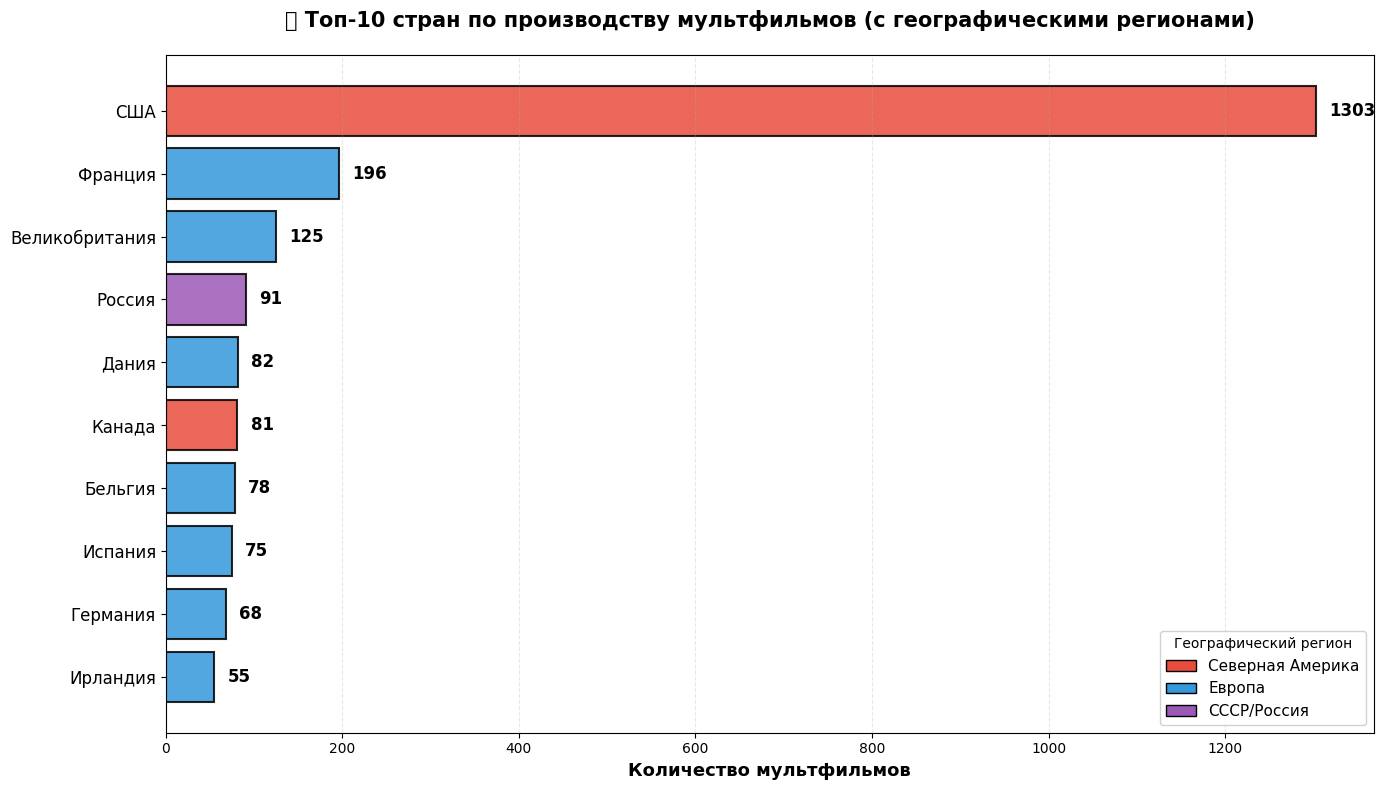


💡 Географический инсайт:
   Северная Америка: 1384 фильмов
   Европа: 679 фильмов
   СССР/Россия: 91 фильмов

🔴 Северная Америка (США + Канада) — безусловный лидер
🔵 Европа представлена широко (Франция, Дания, Великобритания и др.)
🟣 СССР/Россия — сильная позиция благодаря советской анимационной школе


In [ ]:
# 📊 Географическая визуализация 3: Топ-10 стран с географическим контекстом
# Горизонтальный bar chart с географическими регионами

import matplotlib.pyplot as plt
import numpy as np

# 1. Подготовка данных
top10 = country_stats_clean.nlargest(10, 'film_count')

# 2. Определяем географические регионы (расширенный список)
region_colors = {
    'Северная Америка': '#e74c3c',
    'Европа': '#3498db',
    'Азия': '#f39c12',
    'СССР/Россия': '#9b59b6',
    'Океания': '#1abc9c',
    'Другие': '#95a5a6'  # Для стран без маппинга
}

regions = {
    'США': 'Северная Америка', 'Канада': 'Северная Америка',
    'Мексика': 'Северная Америка', 'Аргентина': 'Северная Америка',
    'Франция': 'Европа', 'Дания': 'Европа', 'Великобритания': 'Европа',
    'Нидерланды': 'Европа', 'Бельгия': 'Европа', 'Германия': 'Европа',
    'Испания': 'Европа', 'Италия': 'Европа', 'Чехословакия': 'Европа',
    'Швеция': 'Европа', 'Польша': 'Европа', 'Ирландия': 'Европа',
    'Норвегия': 'Европа', 'Финляндия': 'Европа', 'Австрия': 'Европа',
    'Швейцария': 'Европа', 'Венгрия': 'Европа', 'Люксембург': 'Европа',
    'Румыния': 'Европа', 'Португалия': 'Европа', 'Греция': 'Европа',
    'Болгария': 'Европа',
    'СССР': 'СССР/Россия', 'Россия': 'СССР/Россия',
    'Япония': 'Азия', 'Южная Корея': 'Азия', 'Китай': 'Азия',
    'Республика Корея': 'Азия', 'Индия': 'Азия', 'Израиль': 'Азия',
    'Турция': 'Азия',
    'Австралия': 'Океания', 'Новая Зеландия': 'Океания',
    'Бразилия': 'Южная Америка', 'Чили': 'Южная Америка',
    'ЮАР': 'Африка'
}

# 3. Маппинг с обработкой отсутствующих значений
top10['region'] = top10['country'].map(regions).fillna('Другие')  # Заполняем NaN
top10['color'] = top10['region'].map(region_colors)

# 4. Проверка на NaN (на всякий случай)
if top10['color'].isna().any():
    print("⚠️ Предупреждение: есть страны без цвета, заменяем на серый")
    top10['color'] = top10['color'].fillna('#95a5a6')

# 5. Создаём график
fig, ax = plt.subplots(figsize=(14, 8))

y_pos = np.arange(len(top10))
bars = ax.barh(y_pos, top10['film_count'], color=top10['color'].tolist(),
               edgecolor='black', linewidth=1.5, alpha=0.85)

# 6. Добавляем значения на столбцы
for i, (value, country) in enumerate(zip(top10['film_count'], top10['country'])):
    ax.text(value + 15, i, f'{int(value)}',
            va='center', fontsize=12, fontweight='bold')

# 7. Оформление
ax.set_yticks(y_pos)
ax.set_yticklabels(top10['country'], fontsize=12)
ax.set_xlabel('Количество мультфильмов', fontsize=13, fontweight='bold')
ax.set_title('🌍 Топ-10 стран по производству мультфильмов (с географическими регионами)',
             fontsize=15, fontweight='bold', pad=20)
ax.grid(axis='x', alpha=0.3, linestyle='--')
ax.invert_yaxis()

# 8. Легенда регионов (только те, что есть в топ-10)
from matplotlib.patches import Patch
unique_regions = top10['region'].unique()
legend_elements = [Patch(facecolor=region_colors[region], edgecolor='black', label=region)
                   for region in unique_regions]
ax.legend(handles=legend_elements, loc='lower right', fontsize=11,
          title='Географический регион', framealpha=0.9)

plt.tight_layout()
plt.show()

# 9. Инсайт
print("\n💡 Географический инсайт:")
region_counts = top10.groupby('region')['film_count'].sum().sort_values(ascending=False)
for region, count in region_counts.items():
    print(f"   {region}: {int(count)} фильмов")

print("\n🔴 Северная Америка (США + Канада) — безусловный лидер")
print("🔵 Европа представлена широко (Франция, Дания, Великобритания и др.)")
print("🟣 СССР/Россия — сильная позиция благодаря советской анимационной школе")

🔥 Визуализация 4: Sunburst Chart (Plotly) — Иерархия: Мир → Регион → Страна

In [ ]:
# 🔥 Географическая визуализация 4: Sunburst Chart
# Иерархическая визуализация: Мир → Географический регион → Страна

import plotly.express as px

# 1. Подготовка иерархических данных
df_regions = country_stats_clean.copy()
df_regions['region'] = df_regions['country'].map(regions).fillna('Другие')

# 2. Группировка по регионам
region_totals = df_regions.groupby('region')['film_count'].sum().reset_index()
region_totals['country'] = region_totals['region']
region_totals['parent'] = 'Мир'

# 3. Данные по странам
country_data = df_regions.copy()
country_data['parent'] = country_data['region']

# 4. Добавляем корневой узел
root = pd.DataFrame([{'country': 'Мир', 'parent': '', 'film_count': country_data['film_count'].sum(), 'region': 'Мир'}])

# 5. Объединяем все уровни
sunburst_data = pd.concat([root, region_totals[['country', 'parent', 'film_count', 'region']],
                           country_data[['country', 'parent', 'film_count', 'region']]], ignore_index=True)

# 6. Создаём Sunburst
fig = px.sunburst(
    sunburst_data,
    names='country',
    parents='parent',
    values='film_count',
    color='film_count',
    color_continuous_scale='RdYlGn_r',
    title='🌍 Глобальная структура анимационной индустрии (иерархия: Мир → Регион → Страна)'
)

fig.update_layout(
    height=700,
    font=dict(size=12)
)

fig.show()

# 7. Инсайт
print("\n💡 Инсайт из Sunburst:")
print("📍 Центр = весь мир производства мультфильмов")
print("📍 Первое кольцо = географические регионы (доли очевидны)")
print("📍 Внешнее кольцо = конкретные страны (кликабельно!)")
print("\n🎯 Интерактивность: кликните на сегмент, чтобы \"увеличить\" регион!")


💡 Инсайт из Sunburst:
📍 Центр = весь мир производства мультфильмов
📍 Первое кольцо = географические регионы (доли очевидны)
📍 Внешнее кольцо = конкретные страны (кликабельно!)

🎯 Интерактивность: кликните на сегмент, чтобы "увеличить" регион!


Инсайт: Sunburst идеально показывает пропорции: ~40% Северная Америка, ~35% Европа, остальное — СССР/Азия.

# 💎 Визуализация 5: Treemap (Plotly) — Площадь = количество фильмов

In [ ]:
# 💎 Географическая визуализация 5: Treemap
# Прямоугольники, площадь которых пропорциональна количеству фильмов

import plotly.express as px

# 1. Подготовка данных
treemap_data = country_stats_clean.copy()
treemap_data['region'] = treemap_data['country'].map(regions).fillna('Другие')

# 2. Топ-15 стран для читаемости
top15_treemap = treemap_data.nlargest(15, 'film_count')

# 3. Создаём Treemap
fig = px.treemap(
    top15_treemap,
    path=[px.Constant("Мировая анимация"), 'region', 'country'],
    values='film_count',
    color='film_count',
    color_continuous_scale='Plasma',
    title='🗺️ Treemap: Площадь прямоугольника = количество мультфильмов (Топ-15 стран)',
    hover_data={'film_count': ':,'}
)

fig.update_traces(textinfo="label+value")
fig.update_layout(
    height=650,
    font=dict(size=14)
)

fig.show()

# 4. Инсайт
usa_share = (top15_treemap[top15_treemap['country'] == 'США']['film_count'].values[0] /
             top15_treemap['film_count'].sum() * 100)
print(f"\n💡 Визуальный инсайт: США занимают ~{usa_share:.0f}% площади Treemap!")
print("📦 Самые крупные прямоугольники = США, Франция, СССР/Россия")
print("📦 Европейский кластер виден как группа средних прямоугольников")


💡 Визуальный инсайт: США занимают ~55% площади Treemap!
📦 Самые крупные прямоугольники = США, Франция, СССР/Россия
📦 Европейский кластер виден как группа средних прямоугольников


Инсайт: Treemap мгновенно показывает доминирование США — их прямоугольник огромен!

# 🎯 Итоговый географический инсайт:

In [ ]:
# 🎯 Общий географический анализ

print("="*70)
print("🌍 ГЕОГРАФИЧЕСКИЕ ПАТТЕРНЫ МИРОВОЙ АНИМАЦИОННОЙ ИНДУСТРИИ")
print("="*70)

# 1. Анализ по регионам
region_stats = df_regions.groupby('region')['film_count'].sum().sort_values(ascending=False)
total = region_stats.sum()

print("\n📊 Распределение по регионам:")
for region, count in region_stats.items():
    share = count / total * 100
    print(f"   {region:20s}: {int(count):4d} фильмов ({share:5.1f}%)")

# 2. Концентрация производства
top5_share = country_stats_clean.nlargest(5, 'film_count')['film_count'].sum() / total * 100
top10_share = country_stats_clean.nlargest(10, 'film_count')['film_count'].sum() / total * 100

print(f"\n🎯 Концентрация производства:")
print(f"   Топ-5 стран контролируют:  {top5_share:.1f}% мирового производства")
print(f"   Топ-10 стран контролируют: {top10_share:.1f}% мирового производства")

# 3. Кластеры
print(f"\n🌐 Географические кластеры:")
print(f"   🔴 Северо-Американский: США + Канада (доминанты)")
print(f"   🔵 Западно-Европейский: Франция, Дания, Великобритания (сильные)")
print(f"   🟣 Восточно-Европейский: СССР/Россия (историческое наследие)")
print(f"   🟠 Азиатский: Япония, Ю. Корея (растущий)")

print("\n" + "="*70)

🌍 ГЕОГРАФИЧЕСКИЕ ПАТТЕРНЫ МИРОВОЙ АНИМАЦИОННОЙ ИНДУСТРИИ

📊 Распределение по регионам:
   Северная Америка    : 1414 фильмов ( 55.4%)
   Европа              :  863 фильмов ( 33.8%)
   Азия                :  118 фильмов (  4.6%)
   СССР/Россия         :   91 фильмов (  3.6%)
   Океания             :   63 фильмов (  2.5%)
   Африка              :    2 фильмов (  0.1%)

🎯 Концентрация производства:
   Топ-5 стран контролируют:  70.4% мирового производства
   Топ-10 стран контролируют: 84.4% мирового производства

🌐 Географические кластеры:
   🔴 Северо-Американский: США + Канада (доминанты)
   🔵 Западно-Европейский: Франция, Дания, Великобритания (сильные)
   🟣 Восточно-Европейский: СССР/Россия (историческое наследие)
   🟠 Азиатский: Япония, Ю. Корея (растущий)

